# Laboratory work №2
### Practice with NumPy and Pandas libraries

<p align="left">
    <img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" alt="NumPy Logo" width="200"/>
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" alt="Pandas Logo" width="200"/>
</p>
<p align="left">
Documentation:
    <a href="https://numpy.org/doc/stable/">
        NumPy
    </a>
    ,
    <a href="https://pandas.pydata.org/docs/">
        Pandas
    </a>
</p>


## Задачи

### ⦁	Использование команд библиотеки NumPy

1. Одномерный массив с числами до 100, кратными 5

In [58]:
import numpy as np
my_array = np.arange(5, 101, 5)
print(my_array)

[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]


2. Массив с числами, кратными 10

In [59]:
multiples_of_10 = my_array[my_array % 10 == 0]
print(multiples_of_10)

[ 10  20  30  40  50  60  70  80  90 100]


3. Двумерный массив с двумя столбцами

In [60]:
two_column_array = multiples_of_10.reshape(-1, 2)
print(two_column_array)

[[ 10  20]
 [ 30  40]
 [ 50  60]
 [ 70  80]
 [ 90 100]]


4. Массив, где каждый элемент на 5 меньше исходного

In [61]:
second_two_column_array = two_column_array - 5
print(second_two_column_array)

[[ 5 15]
 [25 35]
 [45 55]
 [65 75]
 [85 95]]


5. Горизонтальное соединение массивов с транспонированием

In [62]:
combined_array = np.hstack((two_column_array, second_two_column_array))
print(combined_array)

[[ 10  20   5  15]
 [ 30  40  25  35]
 [ 50  60  45  55]
 [ 70  80  65  75]
 [ 90 100  85  95]]


6. Деление 2 и 3 строки на 4 строку

In [63]:
division_2nd_row = combined_array[1] / combined_array[3]
division_3rd_row = combined_array[2] / combined_array[3]

new_combined_array = combined_array.copy().astype(float)
new_combined_array[1] = division_2nd_row
new_combined_array[2] = division_3rd_row

print(new_combined_array)

[[ 10.          20.           5.          15.        ]
 [  0.42857143   0.5          0.38461538   0.46666667]
 [  0.71428571   0.75         0.69230769   0.73333333]
 [ 70.          80.          65.          75.        ]
 [ 90.         100.          85.          95.        ]]


7. Оставить только те значения, которые не изменились после деления

In [64]:
equals = np.all(combined_array == new_combined_array, axis=1)
old_data = new_combined_array[equals]

print(old_data)

[[ 10.  20.   5.  15.]
 [ 70.  80.  65.  75.]
 [ 90. 100.  85.  95.]]


8. Поменять местами первую и третью строки

In [65]:
old_data[[0, 2]] = old_data[[2, 0]]
print(old_data)

[[ 90. 100.  85.  95.]
 [ 70.  80.  65.  75.]
 [ 10.  20.   5.  15.]]


9. Среднее, медиана и стандартное отклонение для каждой строки

In [66]:
means = np.mean(old_data, axis=1)
medians = np.median(old_data, axis=1)
std_devs = np.std(old_data, axis=1)

print("Mean:", means)
print("Median:", medians)
print("STD:", std_devs)


Mean: [92.5 72.5 12.5]
Median: [92.5 72.5 12.5]
STD: [5.59016994 5.59016994 5.59016994]


10. Нормализация на максимальное значение вдоль строк

In [67]:
normalized_array = old_data / np.max(old_data, axis=1).reshape(-1, 1)
print(normalized_array)

[[0.9    1.     0.85   0.95  ]
 [0.875  1.     0.8125 0.9375]
 [0.5    1.     0.25   0.75  ]]


### ⦁	Использование команд библиотеки Pandas

Подключаем библиотеку и мпортируем данные из файла 

In [74]:
import pandas as pd
df = pd.read_csv('Global Population Trends(2016-2022).csv')

1. Считаем несколько первых записей таблицы

In [75]:
print(df.head())

       Country  Year Total Population Urban Population Rural Population  \
0  Afghanistan  2017                -                -                -   
1  Afghanistan  2018       36,686,784        9,353,296       27,333,488   
2  Afghanistan  2019       37,769,499        9,727,157       28,042,342   
3  Afghanistan  2020       38,972,230       10,142,913       28,829,317   
4  Afghanistan  2021       40,099,462       10,551,772       29,547,690   

  Population Density Life Expectancy  Birth Rate  Death Rate Fertility Rate  \
0                 55            63.0      37.342       7.027          5.129   
1                 56            63.0      36.927       6.981          5.002   
2                 58            64.0      36.466       6.791           4.87   
3                 60            63.0      36.051       7.113           4.75   
4                  -            62.0      35.842       7.344          4.643   

  Infant Mortality Rate Growth Rate  
0                  49.4           - 

2. Определяем размерность данного фрейма

In [76]:
print(df.shape)

(1073, 12)


3. Выводим название заголовков столбцов фрейма

In [77]:
print(df.columns)

Index(['Country', 'Year', 'Total Population', 'Urban Population',
       'Rural Population', 'Population Density', 'Life Expectancy',
       'Birth Rate', 'Death Rate', 'Fertility Rate', 'Infant Mortality Rate',
       'Growth Rate'],
      dtype='object')


4. Получаем описание всех переменных

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1073 non-null   object 
 1   Year                   1073 non-null   int64  
 2   Total Population       1073 non-null   object 
 3   Urban Population       1073 non-null   object 
 4   Rural Population       1073 non-null   object 
 5   Population Density     1073 non-null   object 
 6   Life Expectancy        1073 non-null   object 
 7   Birth Rate             1073 non-null   float64
 8   Death Rate             1073 non-null   float64
 9   Fertility Rate         1073 non-null   object 
 10  Infant Mortality Rate  1073 non-null   object 
 11  Growth Rate            1073 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 100.7+ KB
None


5. Удаляем строки, не содержащие значения в столбце «Total Population»

In [80]:
df1=df[df['Total Population']!='-']
print (df1)


          Country  Year Total Population Urban Population Rural Population  \
1     Afghanistan  2018       36,686,784        9,353,296       27,333,488   
2     Afghanistan  2019       37,769,499        9,727,157       28,042,342   
3     Afghanistan  2020       38,972,230       10,142,913       28,829,317   
4     Afghanistan  2021       40,099,462       10,551,772       29,547,690   
6         Albania  2018        2,866,376        1,728,969        1,137,407   
...           ...   ...              ...              ...              ...   
1067       Zambia  2021       19,473,125        8,800,295       10,672,830   
1069     Zimbabwe  2018       15,052,184        4,848,158       10,204,026   
1070     Zimbabwe  2019       15,354,608        4,945,719       10,408,889   
1071     Zimbabwe  2020       15,669,666        5,052,214       10,617,452   
1072     Zimbabwe  2021       15,993,524        5,166,388       10,827,136   

     Population Density Life Expectancy  Birth Rate  Death Rate

6. Получаем описательную статистику по переменным

In [81]:
print(df1.describe())
print(df1.max())
print(df1.min())
print(df1['Total Population'].describe())

              Year  Birth Rate  Death Rate
count   864.000000  864.000000  864.000000
mean   2019.500000   18.548384    7.889123
std       1.118682    9.887518    3.041385
min    2018.000000    0.000000    0.000000
25%    2018.750000   10.500000    6.116500
50%    2019.500000   15.628500    7.453500
75%    2020.250000   25.565000    9.385000
max    2021.000000   46.127000   21.700000
Country                    Zimbabwe
Year                           2021
Total Population             99,258
Urban Population         99,876,265
Rural Population            998,397
Population Density               99
Life Expectancy                85.0
Birth Rate                   46.127
Death Rate                     21.7
Fertility Rate                7.023
Infant Mortality Rate           9.9
Growth Rate                     5.0
dtype: object
Country                  Afghanistan
Year                            2018
Total Population           1,057,198
Urban Population                   -
Rural Population   

7. Выполняем сортировку данных по нескольким критериям

In [82]:
sorted_df = df1.sort_values(by=['Country', 'Total Population'], ascending=[True, False])
print(sorted_df.head())

       Country  Year Total Population Urban Population Rural Population  \
4  Afghanistan  2021       40,099,462       10,551,772       29,547,690   
3  Afghanistan  2020       38,972,230       10,142,913       28,829,317   
2  Afghanistan  2019       37,769,499        9,727,157       28,042,342   
1  Afghanistan  2018       36,686,784        9,353,296       27,333,488   
6      Albania  2018        2,866,376        1,728,969        1,137,407   

  Population Density Life Expectancy  Birth Rate  Death Rate Fertility Rate  \
4                  -            62.0      35.842       7.344          4.643   
3                 60            63.0      36.051       7.113           4.75   
2                 58            64.0      36.466       6.791           4.87   
1                 56            63.0      36.927       6.981          5.002   
6                105            79.0      10.517       8.308           1.44   

  Infant Mortality Rate Growth Rate  
4                  43.4         3.0 

8. Выводим название страны с максимальной численностью населения

In [83]:
country_max_population = df1.loc[df1['Total Population'].idxmax(), 'Country']
print(f"Страна с максимальной численностью населения: {country_max_population}")


Страна с максимальной численностью населения: Seychelles


9. Выводим название страны с минимальной численностью населения 

In [84]:
country_min_population = df1.loc[df1['Total Population'].idxmin(), 'Country']
print(f"Страна с минимальной численностью населения: {country_min_population}")


Страна с минимальной численностью населения: Djibouti


10. Экспортируем фрейм в MS Excel  
*подключаем openpyx1 через команду*  
*pip install openpyx1*

In [87]:
df1.to_excel("Global_Population_Trends_Processed.xlsx", index=False)

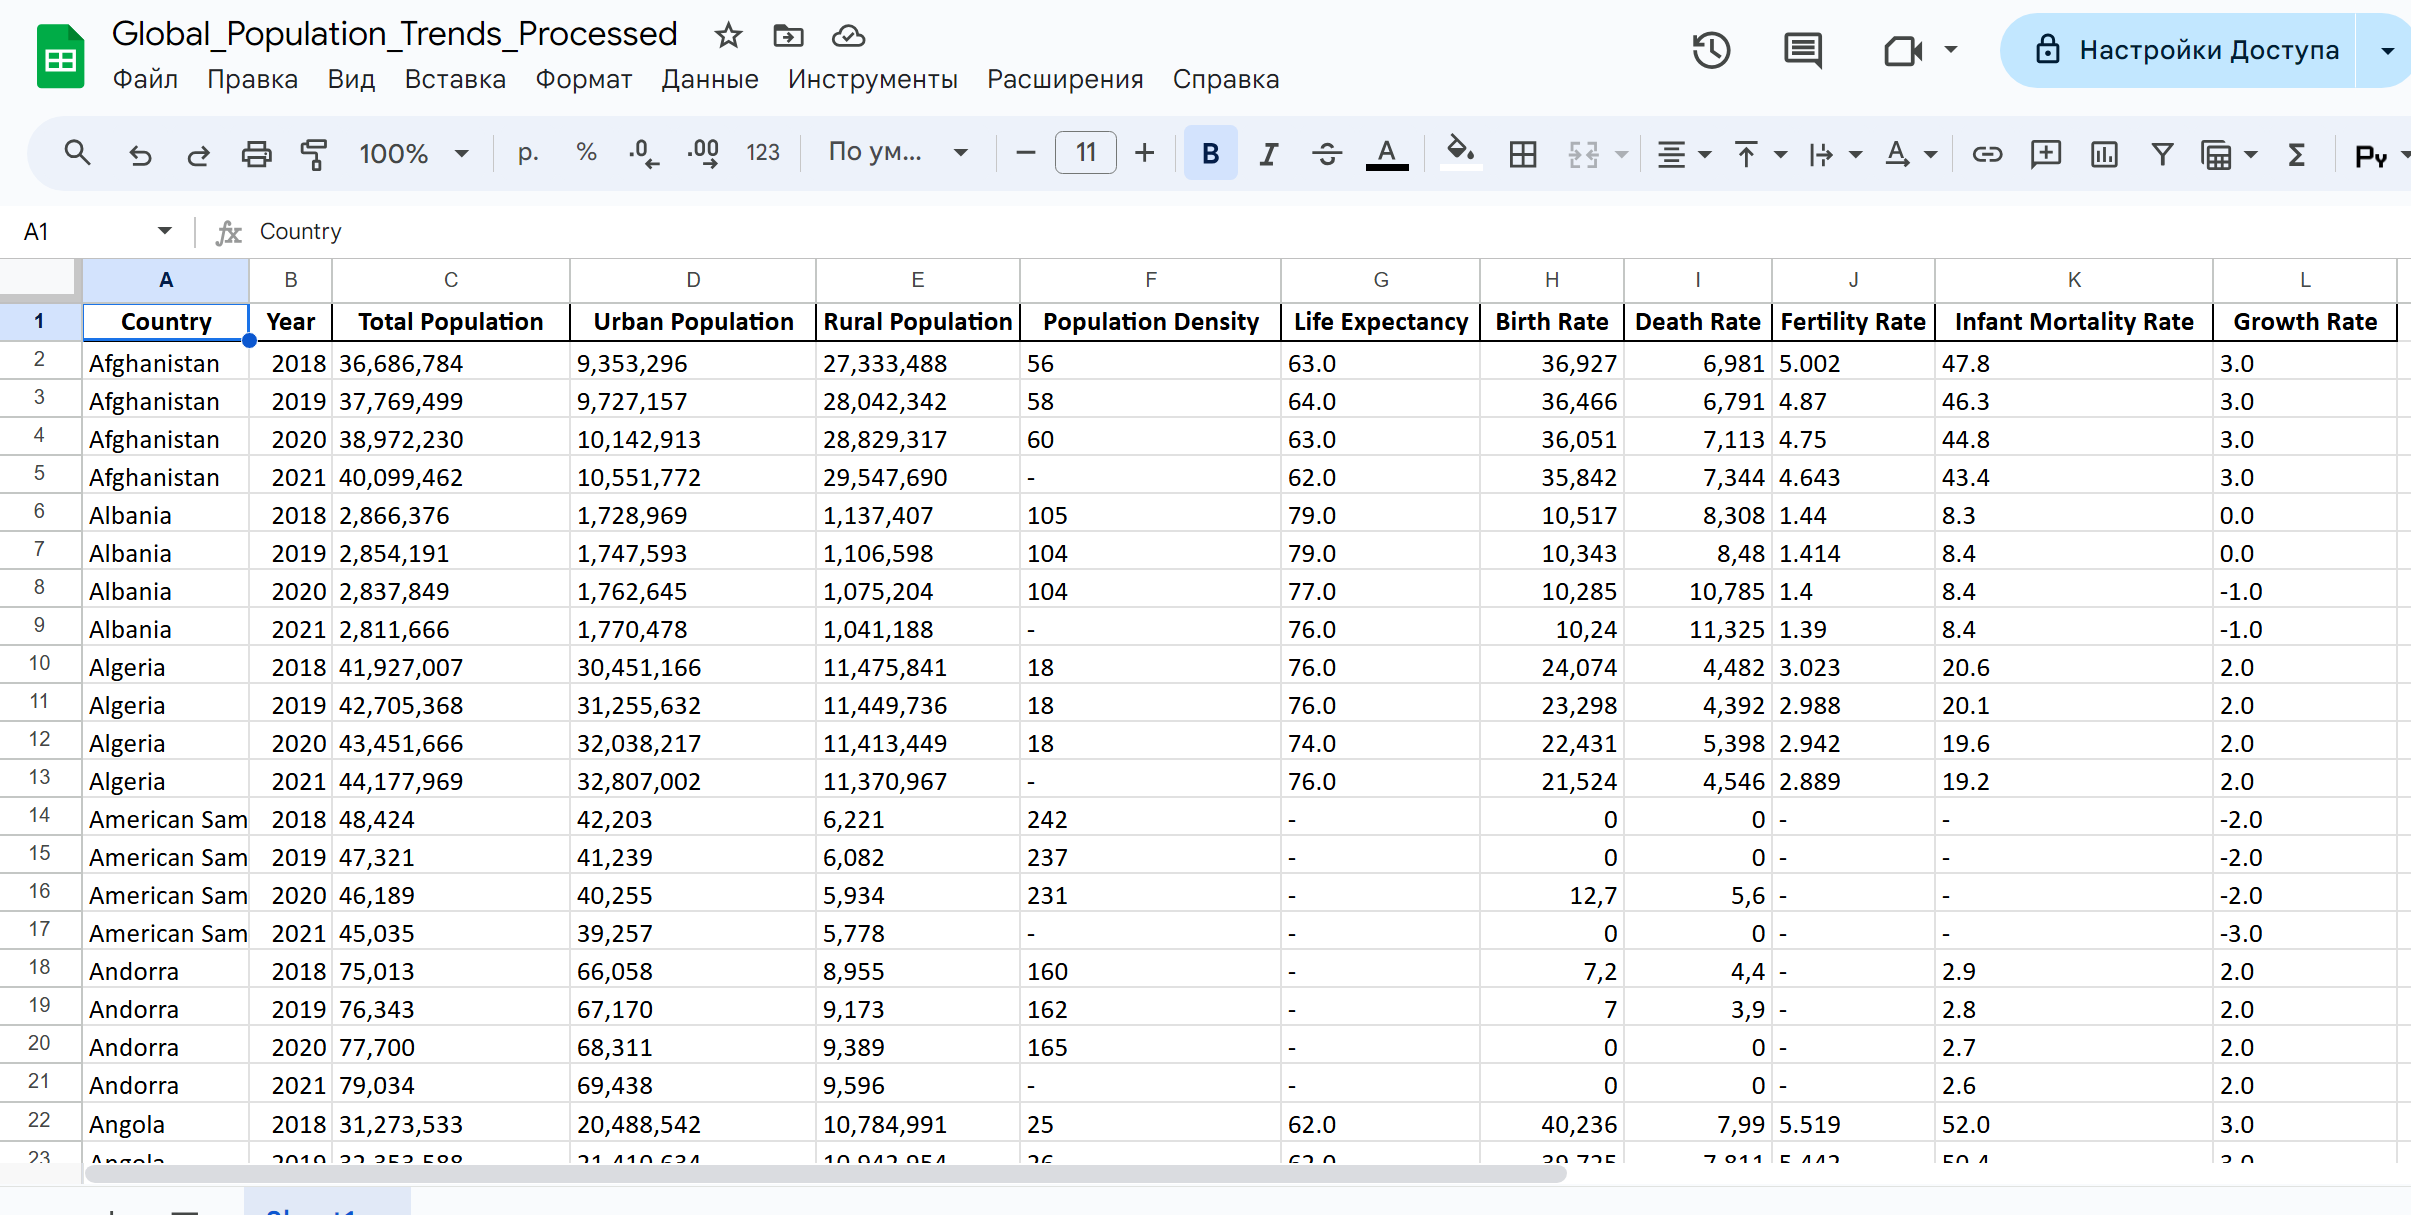